# Proyek Analisis Data: Nama dataset
- Nama: M. ZHafran Ramadhan
- Email: m.zhafranr@gmail.com
- Id Dicoding: m.zhafranr

## Menentukan Pertanyaan Bisnis

- Korelasi antara suhu, kelembaban, serta kecepatan angin dalam jumlah peminjaman sepeda?
- Bagaimana distribusi peminjaman sepeda dari waktu ke waktu?
- Bagaimana situasi cuaca mempengaruhi peminjaman sepeda?
- Apakah ada musim tertentu di mana peminjaman sepeda lebih populer?
- Apakah ada perbedaan dalam pola peminjaman sepeda pada hari kerja dan akhir pekan?

## Menyaipkan semua library yang dibuthkan

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahapan ini merupakan tahapan pengumpulan dataset. Pada kasus ini saya memilih **Bike Sharing Dataset**. dalam file tersebut terdapat 2 file yakni data harian (day.csv), dan data harian beserta durasi peminjaman (hr.csv)

In [9]:
df_day = pd.read_csv("https://raw.githubusercontent.com/mzhafranr/Bike_Sharing/main/data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
df_hr = pd.read_csv("https://raw.githubusercontent.com/mzhafranr/Bike_Sharing/main/data/hour.csv")
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset yang akan digunakan pada Final Project ini adalah **day.csv** hal ini dikarenakan data pada file **hr.csv** kurang relevan dengan pertanyaan yang akan diselesaikan

In [11]:
# Menghapus dataframe hour.csv

del df_hr

### Assessing Data

In [12]:
# Melihat info dari dataset

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
# Mengecek missing value

df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# Mengecek data duplikat

df_day.duplicated().sum()

0

In [15]:
# Menampilkan ringkasan statistik

df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

# Penghapusan kolom 
Menghapus kolom **instant** dikarenakan ke lima kolom itu nantinya tidak akan digunakan dan tidak menjawab dari pertanyaan

In [16]:
drop_col = ['instant']

for i in df_day.columns:
  if i in drop_col:
    df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Merubah beberapa detail pada kolom
Perubahan detail pada kolom ini meliputi perubahan nama kolom, serta perubahan tipe data yang sebelumnya angka seperti pada tipe data season, weekday, dll di rubah menjadi tipe data kategorikal, serta ada 1 tipe data yang tidak sesuai yakni dteday yang akan diubah menjadi time series

In [17]:
# Mengubah nama judul kolom
df_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mapping numeric values to month names
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Mapping numeric values to season names
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mapping numeric values to weekday names
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Mapping numeric values to weather condition names
df_day['weather_cond'] = df_day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [19]:
# Mengubah tipe data ke datetime
df_day['dateday'] = pd.to_datetime(df_day.dateday)

# Mengubaha tipe data ke categorical
df_day['season'] = df_day.season.astype('category')
df_day['year'] =df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weather_cond'] = df_day.weather_cond.astype('category')

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  windspeed     731 non-null    float64       
 12  casual        731 non-null    int64         
 13  registered    731 non-null    int64         
 14  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float

## Exploratory Data Analysis (EDA)

### Explorasi Data df_day

    1 Pengelompokan penyewa sepeda(casual dan registeres) berdasarkan bulan

In [21]:
result = df_day.groupby(by='month').agg({
    'count': 'mean'
})

# Mengurutkan berdasarkan nilai sum dari yang terbesar ke yang terkecil
result_sorted = result.sort_values(by='count', ascending=False)

print(result_sorted)


             count
month             
Jun    5772.366667
Sep    5766.516667
Aug    5664.419355
Jul    5563.677419
May    5349.774194
Oct    5199.225806
Apr    4484.900000
Nov    4247.183333
Mar    3692.258065
Dec    3403.806452
Feb    2655.298246
Jan    2176.338710


Berdasarkan hasil pengelompokan dapat dilihat rata-rata penyewa terbanyak terdapat pada bulan Juni dan untuk rata-rata paling sedikit terdapat pada bulan januari

       2 Pengelompokan berdasarkan cuaca

In [22]:
df_day.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})
     

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk. 

    3. Penyewa berdasarkan hari libur dan hari kerja

In [23]:
df_day.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil di atas 0 merupakan hari kerja, dan 1 merupakan hari libur. dari data tersebut dapat dilihat bahwasanya penyewa lebih banak melakukan sewa pada Hari Kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana distribusi peminjaman sepeda dari waktu ke waktu

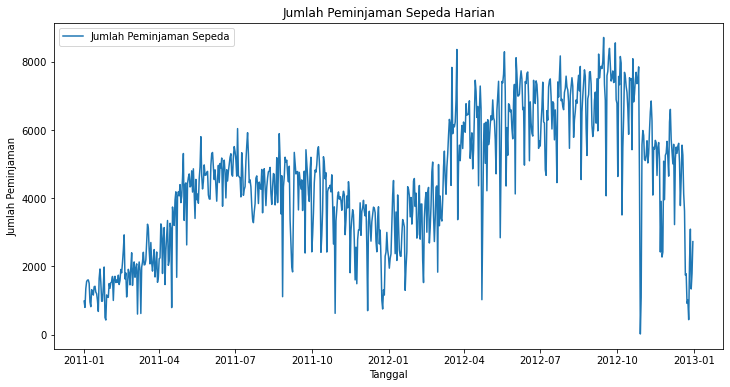

In [24]:
# Plot jumlah peminjaman sepeda harian
plt.figure(figsize=(12, 6))
plt.plot(df_day['dateday'], df_day['count'], label='Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

### Pertanyaan 2:  Bagaimana situasi cuaca mempengaruhi peminjaman sepeda

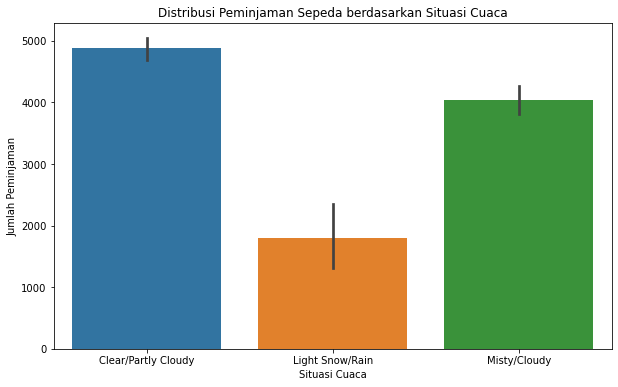

In [25]:
# Plot jumlah peminjaman sepeda berdasarkan situasi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_cond', y='count', data=df_day)
plt.title('Distribusi Peminjaman Sepeda berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 3:  Apakah ada musim tertentu di mana peminjaman sepeda lebih populer

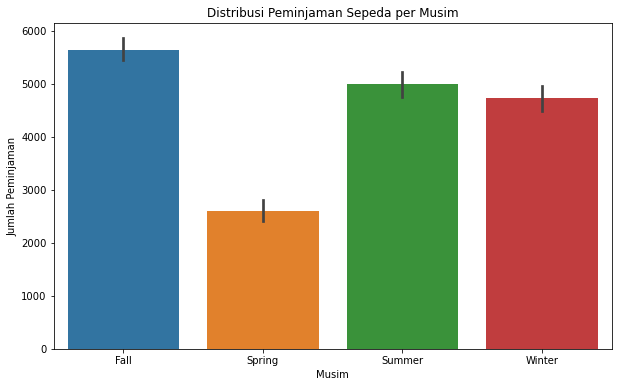

In [26]:
# Plot jumlah peminjaman sepeda per musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=df_day)
plt.title('Distribusi Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 4:  Apakah ada perbedaan dalam pola peminjaman sepeda pada hari kerja dan akhir pekan?

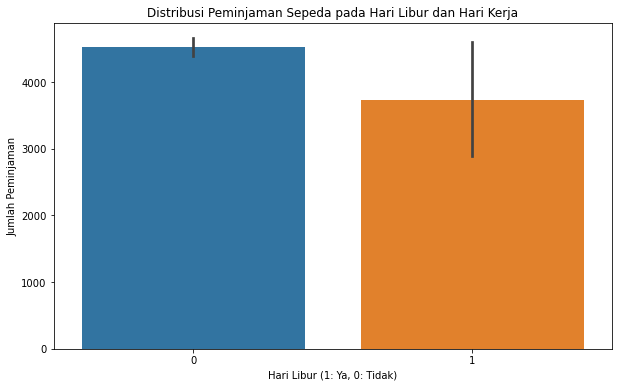

In [27]:
# Plot jumlah peminjaman sepeda pada hari libur dan hari kerja
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=df_day)
plt.title('Distribusi Peminjaman Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Hari Libur (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Conclusion

- conclution pertanyaan 1
 Kesimpulanya trend peminjaman sepeda mengalami kenaikan pada bulan 7 tahun 2011 dan mengalami penurunan kembali pada awal tahun 2012, dan kembali naik dengan signifikan pada bulan 4 tahun 2012, dan mulai mengalami penurunan kembali ketika mendekati bulan ke 10 pada tahun 2012, berdasarkan hal ini dapat dilihat bahwasanya faktor musim, dan perubahan cuaca berpengaruh dalam kasus penyewaan sepeda
 
 
- conclution pertanyaan 2
 Jumlah peminjaman sepeda juga dipengaruhi oleh kondisi cuaca, berdasarkan plot diagram pada pertanyaan ke 3 tingkat peminjaman tertinggi terjadi pada cuaca **clear/parly cloudy** sedangkan untuk tingkat peminjaman terendah ada pada cuaca **Light snow/rain** 
 
 
- conclution pertanyaan 3
 Untuk jumlah peminjaman sepeda juga dipengaruhi oleh faktor musim itu sendiri, tercatat jumlah peminjaman sepeda terbanyak terjadi pada musim gugur, kemudian disusul oleh musim panas dan dingin, dan untuk peminjaman paling sedikit terjadi pada musim semi
 
 
- conclution pertanyaan 4
 Kesimpulan yang cukup menarik antara tingkat peminjaman pada hari kerja dan hari libur kerja. Dimana tingkat peminjaman pada hari kerja lebih tinggi dibandingkan pada hari libur. Hal ini dapat dijelaskan dengan beberapa faktor, termasuk kebiasaan dan rutinitas masyarakat selama hari kerja.